In [23]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
import word2num


reading dataset


In [24]:
df=pd.read_csv('../data/CarPrice_Assignment.csv')

In [25]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [26]:
df.shape

(205, 26)

In [27]:
df=df.set_index('car_ID')

In [28]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [29]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [30]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [31]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [32]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [34]:
#drop unnecessary columns
df=df[['symboling', 
       #'CarName', 
       'fueltype', 
       #'aspiration', 'doornumber',
       'carbody',
        # 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       #'carwidth', 'carheight', 'curbweight', 
       'enginetype', 'cylindernumber','enginesize', 
       #'fuelsystem', 'boreratio',
        'stroke', 
       #'compressionratio',
       'horsepower', 'peakrpm', 
       #'citympg',
       'highwaympg', 'price']]

In [35]:
df

,symboling,fueltype,carbody,enginetype,cylindernumber,enginesize,stroke,horsepower,peakrpm,highwaympg,price
car_ID,,,,,,,,,,,
1,3,gas,convertible,dohc,four,130,2.68,111,5000,27,13495.0
2,3,gas,convertible,dohc,four,130,2.68,111,5000,27,16500.0
3,1,gas,hatchback,ohcv,six,152,3.47,154,5000,26,16500.0
4,2,gas,sedan,ohc,four,109,3.40,102,5500,30,13950.0
5,2,gas,sedan,ohc,five,136,3.40,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,sedan,ohc,four,141,3.15,114,5400,28,16845.0
202,-1,gas,sedan,ohc,four,141,3.15,160,5300,25,19045.0
203,-1,gas,sedan,ohcv,six,173,2.87,134,5500,23,21485.0


In [36]:
df.head()

,symboling,fueltype,carbody,enginetype,cylindernumber,enginesize,stroke,horsepower,peakrpm,highwaympg,price
car_ID,,,,,,,,,,,
1,3,gas,convertible,dohc,four,130,2.68,111,5000,27,13495.0
2,3,gas,convertible,dohc,four,130,2.68,111,5000,27,16500.0
3,1,gas,hatchback,ohcv,six,152,3.47,154,5000,26,16500.0
4,2,gas,sedan,ohc,four,109,3.40,102,5500,30,13950.0
5,2,gas,sedan,ohc,five,136,3.40,115,5500,22,17450.0


In [37]:
df.columns

Index(['symboling', 'fueltype', 'carbody', 'enginetype', 'cylindernumber',
       'enginesize', 'stroke', 'horsepower', 'peakrpm', 'highwaympg', 'price'],
      dtype='object')

In [38]:
df.dtypes

symboling           int64
fueltype           object
carbody            object
enginetype         object
cylindernumber     object
enginesize          int64
stroke            float64
horsepower          int64
peakrpm             int64
highwaympg          int64
price             float64
dtype: object

In [39]:
#change word to num
df['cylindernumber'] = df['cylindernumber'].apply(word2num)

TypeError: 'module' object is not callable. Did you mean: 'word2num.word2num(...)'?

In [ ]:
df['cylindernumber']

car_ID
1      4.0
2      4.0
3      6.0
4      4.0
5      5.0
      ... 
201    4.0
202    4.0
203    6.0
204    6.0
205    4.0
Name: cylindernumber, Length: 205, dtype: float64

In [ ]:
df

,symboling,fueltype,carbody,enginetype,cylindernumber,enginesize,stroke,horsepower,peakrpm,highwaympg,price
car_ID,,,,,,,,,,,
1,3,gas,convertible,dohc,4.0,130,2.68,111,5000,27,13495.0
2,3,gas,convertible,dohc,4.0,130,2.68,111,5000,27,16500.0
3,1,gas,hatchback,ohcv,6.0,152,3.47,154,5000,26,16500.0
4,2,gas,sedan,ohc,4.0,109,3.40,102,5500,30,13950.0
5,2,gas,sedan,ohc,5.0,136,3.40,115,5500,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,sedan,ohc,4.0,141,3.15,114,5400,28,16845.0
202,-1,gas,sedan,ohc,4.0,141,3.15,160,5300,25,19045.0
203,-1,gas,sedan,ohcv,6.0,173,2.87,134,5500,23,21485.0


In [ ]:
df.describe()

,symboling,cylindernumber,enginesize,stroke,horsepower,peakrpm,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,4.380488,126.907317,3.255415,104.117073,5125.121951,30.751220,13276.710571
std,1.245307,1.080854,41.642693,0.313597,39.544167,476.985643,6.886443,7988.852332
min,-2.000000,2.000000,61.000000,2.070000,48.000000,4150.000000,16.000000,5118.000000
25%,0.000000,4.000000,97.000000,3.110000,70.000000,4800.000000,25.000000,7788.000000
50%,1.000000,4.000000,120.000000,3.290000,95.000000,5200.000000,30.000000,10295.000000
75%,2.000000,4.000000,141.000000,3.410000,116.000000,5500.000000,34.000000,16503.000000
max,3.000000,12.000000,326.000000,4.170000,288.000000,6600.000000,54.000000,45400.000000


In [ ]:
#checking duplicates
df.duplicated()


car_ID
1      False
2      False
3      False
4      False
5      False
       ...  
201    False
202    False
203    False
204    False
205    False
Length: 205, dtype: bool

In [ ]:
df.head()

,symboling,fueltype,carbody,enginetype,cylindernumber,enginesize,stroke,horsepower,peakrpm,highwaympg,price
car_ID,,,,,,,,,,,
1,3,gas,convertible,dohc,4.0,130,2.68,111,5000,27,13495.0
2,3,gas,convertible,dohc,4.0,130,2.68,111,5000,27,16500.0
3,1,gas,hatchback,ohcv,6.0,152,3.47,154,5000,26,16500.0
4,2,gas,sedan,ohc,4.0,109,3.40,102,5500,30,13950.0
5,2,gas,sedan,ohc,5.0,136,3.40,115,5500,22,17450.0


<Axes: title={'center': 'price'}, ylabel='Frequency'>

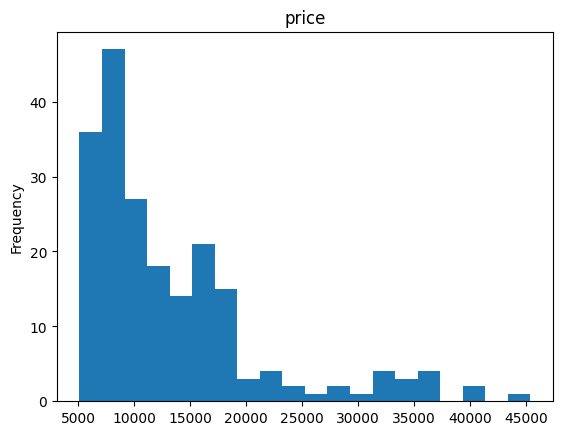

In [ ]:
df['price'].plot(kind='hist',bins=20,title='price')

pairplot

<function matplotlib.pyplot.show(close=None, block=None)>

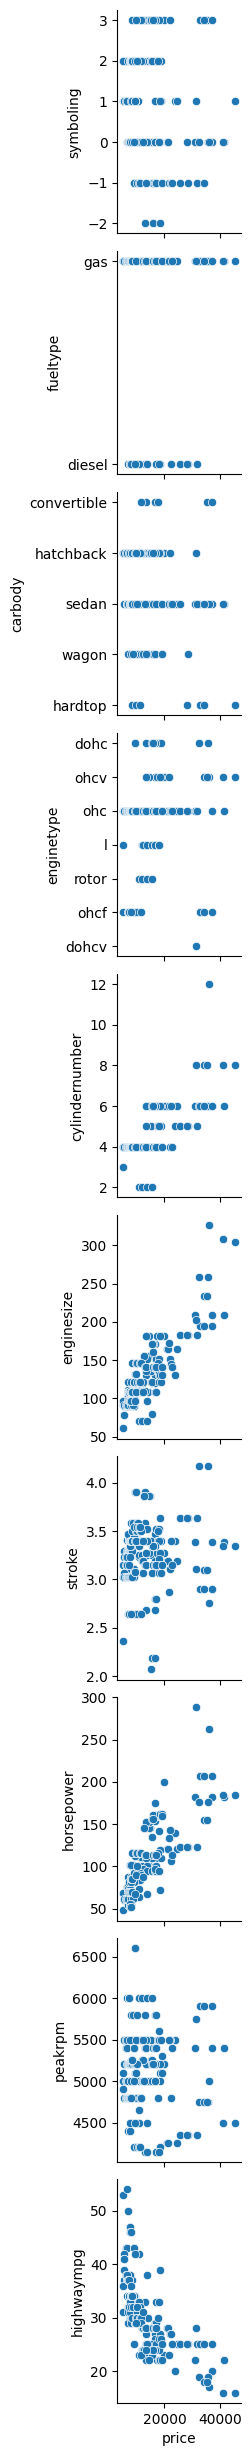

In [ ]:
#pairblot btw features and price
sns.pairplot(df,y_vars=['symboling', 'fueltype', 'carbody', 'enginetype', 'cylindernumber',
       'enginesize', 'stroke', 'horsepower', 'peakrpm', 'highwaympg', ],x_vars='price')
plt.show

correlation

In [ ]:
#correlation btw features and price
df_corr=df[['symboling','cylindernumber','enginesize', 'stroke',
     'horsepower', 'peakrpm', 'highwaympg', 'price']].corr()['price']
df_corr

symboling        -0.079978
cylindernumber    0.718305
enginesize        0.874145
stroke            0.079443
horsepower        0.808139
peakrpm          -0.085267
highwaympg       -0.697599
price             1.000000
Name: price, dtype: float64

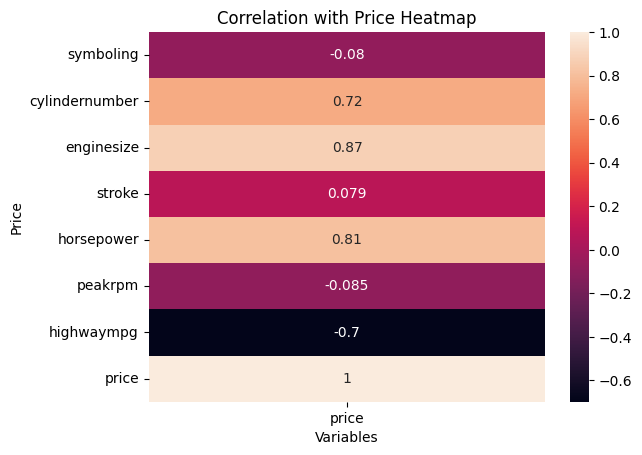

In [ ]:
#heatmap of correlation btw the features and price
sns.heatmap(df_corr.to_frame(), annot=True)
plt.title('Correlation with Price Heatmap')
plt.xlabel('Variables')
plt.ylabel('Price')
plt.show()

In [ ]:
df.head()

,symboling,fueltype,carbody,enginetype,cylindernumber,enginesize,stroke,horsepower,peakrpm,highwaympg,price
car_ID,,,,,,,,,,,
1,3,gas,convertible,dohc,four,130,2.68,111,5000,27,13495.0
2,3,gas,convertible,dohc,four,130,2.68,111,5000,27,16500.0
3,1,gas,hatchback,ohcv,six,152,3.47,154,5000,26,16500.0
4,2,gas,sedan,ohc,four,109,3.40,102,5500,30,13950.0
5,2,gas,sedan,ohc,five,136,3.40,115,5500,22,17450.0


bloxplot btw carbody and price

C:\Users\USER\AppData\Local\Temp\ipykernel_16520\561036140.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('carbody')['price'].apply(list)


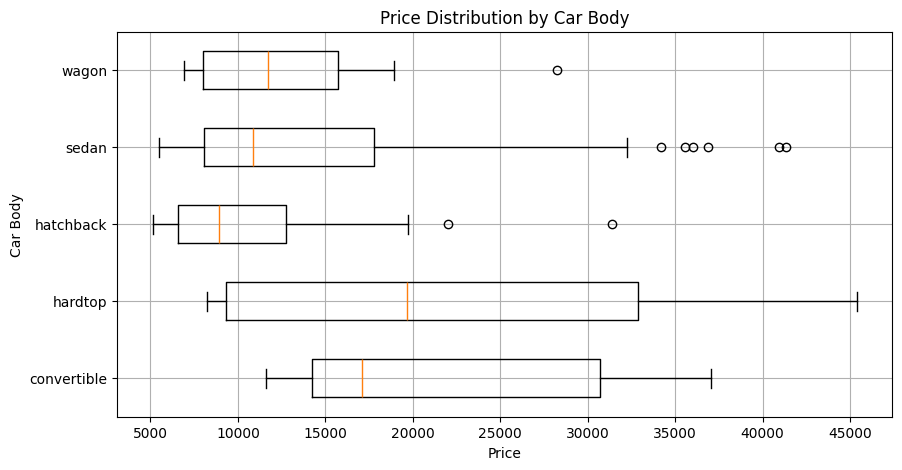

In [ ]:
# Grouping data by 'carbody'
grouped_data = df.groupby('carbody')['price'].apply(list)

# Creating boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(grouped_data.values, labels=grouped_data.index, vert=False)
plt.xlabel('Price')
plt.ylabel('Car Body')
plt.title('Price Distribution by Car Body')
plt.grid(True)
plt.show()


bloxplot btw efueltype and price

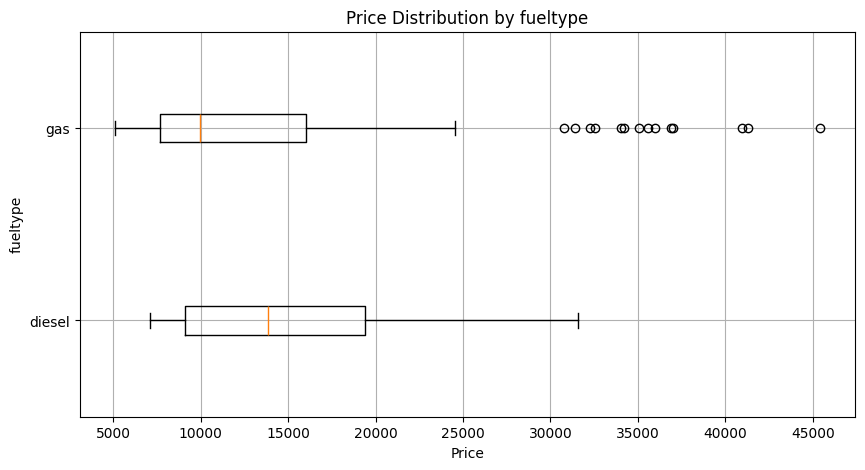

In [ ]:
# Grouping data by 'carbody'
grouped_data = df.groupby('fueltype')['price'].apply(list)

# Creating boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(grouped_data.values, labels=grouped_data.index, vert=False)
plt.xlabel('Price')
plt.ylabel('fueltype')
plt.title('Price Distribution by fueltype')
plt.grid(True)
plt.show()

bloxplot btw enginetype and price

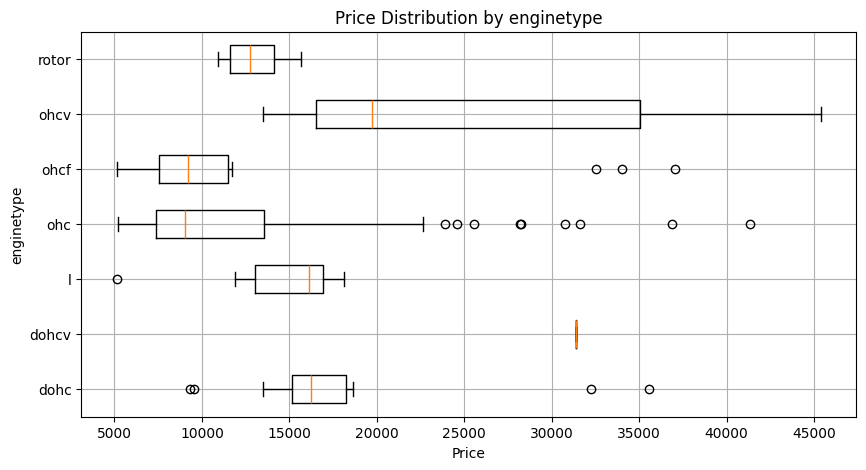

In [ ]:
# Grouping data by 'carbody'
grouped_data = df.groupby('enginetype')['price'].apply(list)

# Creating boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(grouped_data.values, labels=grouped_data.index, vert=False)
plt.xlabel('Price')
plt.ylabel('enginetype')
plt.title('Price Distribution by enginetype')
plt.grid(True)
plt.show()

scatter diagram price vs sympoling

<function matplotlib.pyplot.show(close=None, block=None)>

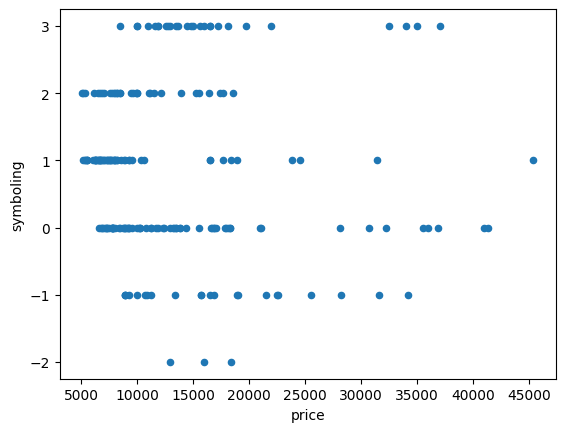

In [ ]:

df.plot(kind='scatter',
        x='price',
        y='symboling')
plt.show